# Principal Component Analysis

PCA is a dimensionality reduction technique that reduces the number of dimensions in a dataset without sacrificing a commensurate amount of information. It has many practical uses:

1. Reducing high-dimensional data to two or three dimensions so that it can be plotted
2. Reducing the number of dimensions and then restoring the original for annomaly detection and noise filtering
3. Anonymizing a dataset so that it can be shared with others without revealing the nature or meaning of the data

## Understanding Principal Component Analysis

If we take a two dimensionsl dataset as an example, the coordinate system is transformed so that one axis captures most of the variance in the dataset. This is the dataset's primary principal component. The other axis contains a narrower range of values and represents the secondary principal component. The number of principal components equals the number of dimensions in a dataset. PCA finds the two principal componets and eliminates the one with less variance. PCA works by building a covariance matrix that quantifies the variance of each dimension with respect to the others, and from the matrix computing eigenvectors and eigenvalues.

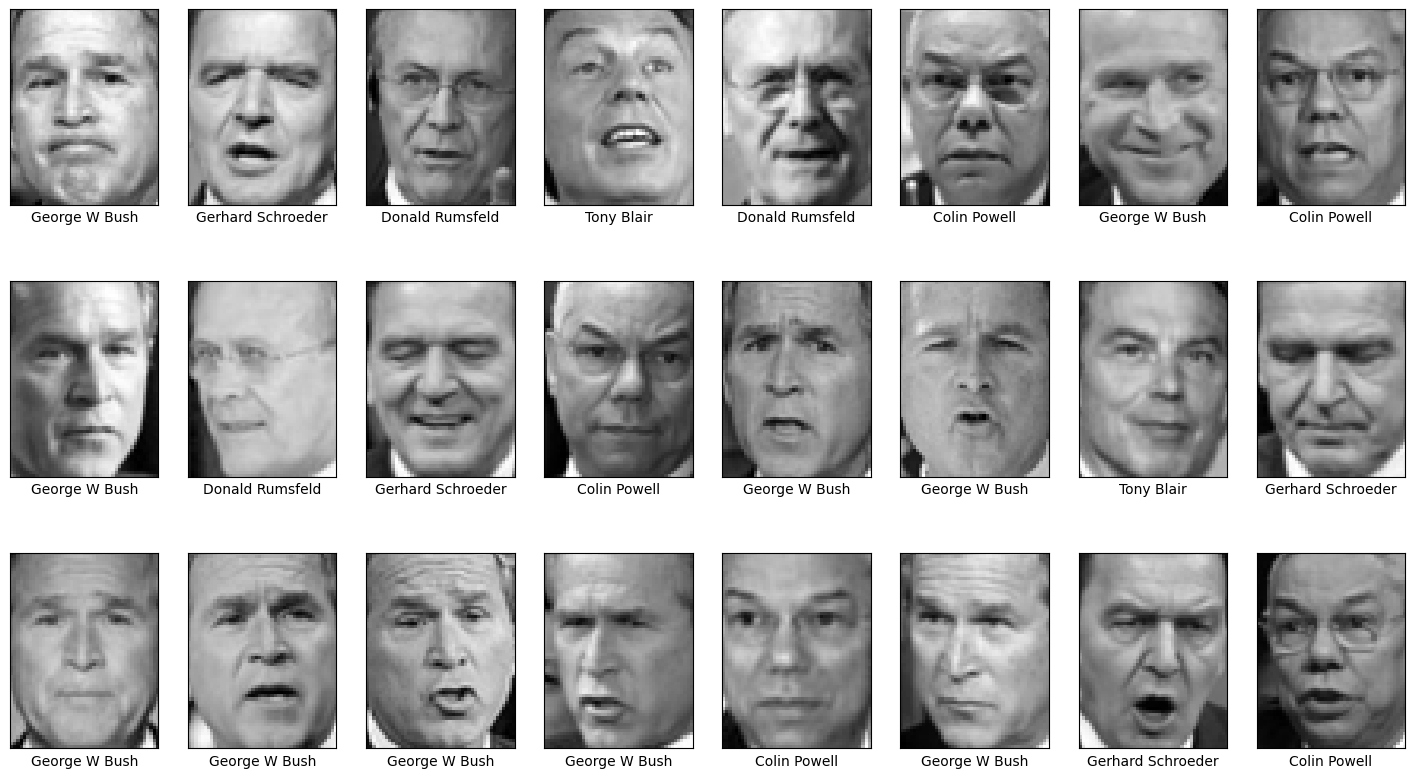

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=100, slice_=None)
faces.images = faces.images[:, 35:97, 39:86]
faces.data = faces.images.reshape(faces.images.shape[0], faces.images.shape[1] * faces.images.shape[2])

fig, ax = plt.subplots(3, 8, figsize=(18, 10))

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

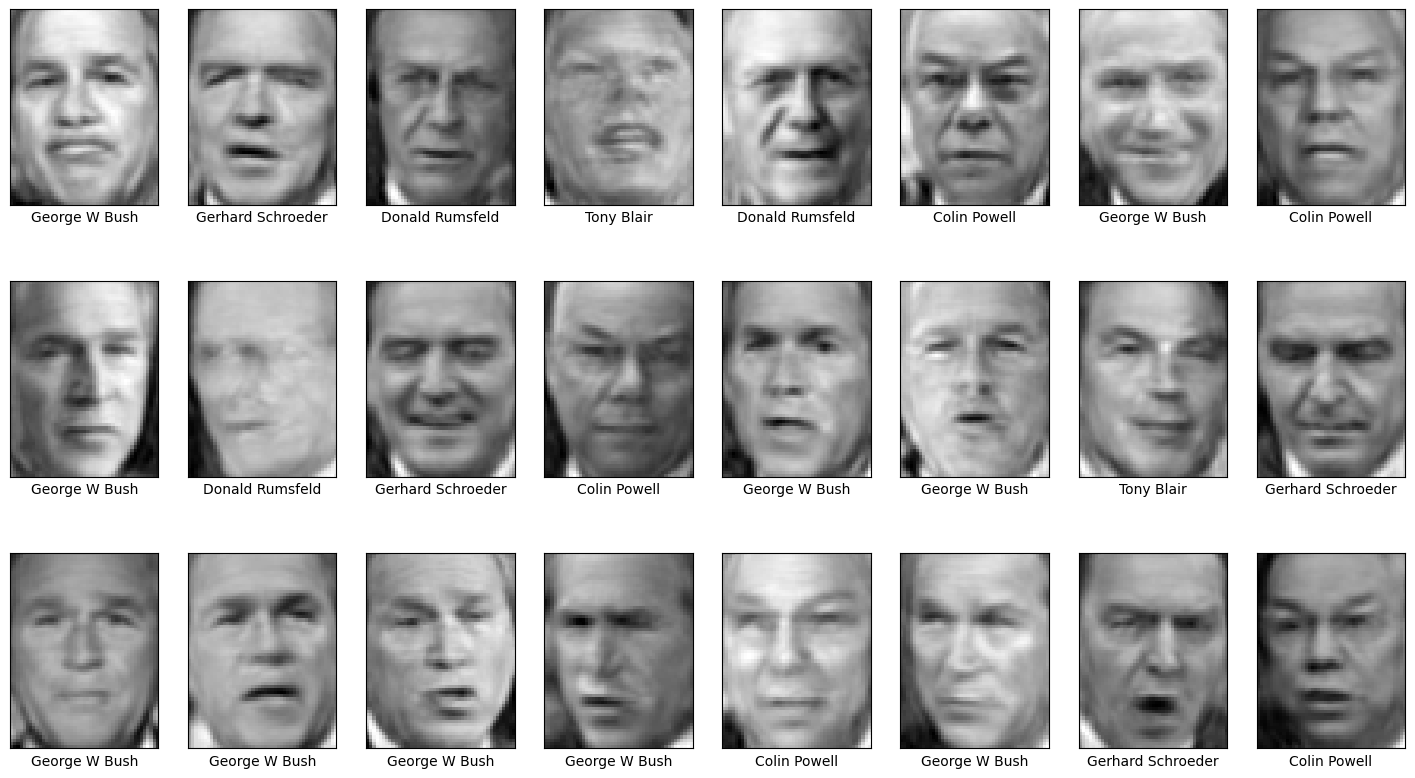

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=150, random_state=0)
pca_faces = pca.fit_transform(faces.data)
unpca_faces = pca.inverse_transform(pca_faces).reshape(1140, 62, 47)

fig, ax = plt.subplots(3, 8, figsize=(18,10))

for i, axi in enumerate(ax.flat):
    axi.imshow(unpca_faces[i], cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

One way to find the optimal number of components is with scree plot, which charts the proportion of explained variance for each dimension.

Text(0, 0.5, 'Explained Variance')

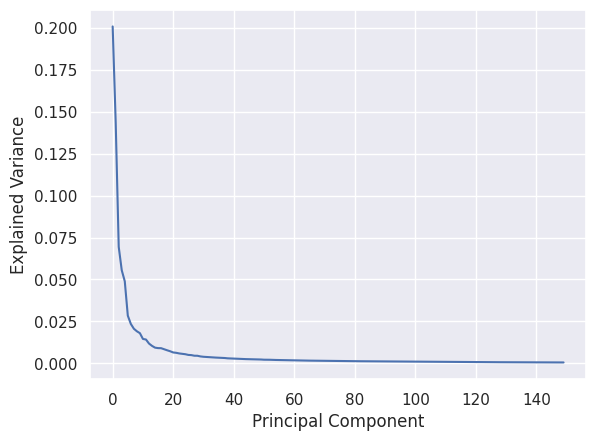

In [7]:
import seaborn as sns
sns.set()

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')

Text(0, 0.5, 'Cumulative Explained Variance')

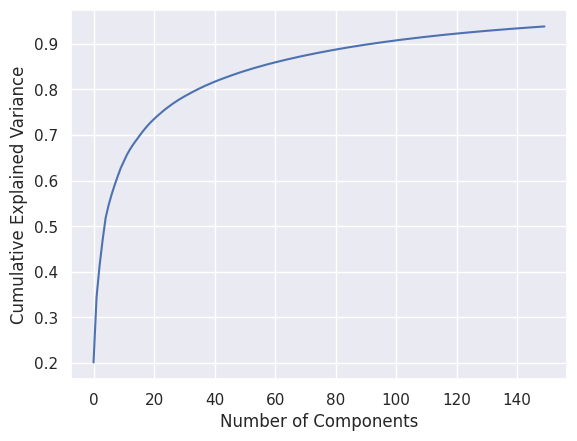

In [8]:
import numpy as np

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')